 Construct a neural network with a single hidden layer containing two neurons
 using Tensorflow. Use ReLUasactivation function. Optimize the network with stochastic
 gradient descent method. Choose mean squared error to calculate the loss. Fit the housing
 prices dataset found on LMS using the network. Use the trained neural network model
 to predict the price of a house in a city with population of 165, 000. Calculate a useful
 regression metric. Plot the training and validation losses. Use a 70%-30% split for the
 training and validation dataset. The architecture of the neural network and the optimizer
 are fixed for this problem. Therefore, you need to choose a suitable learning rate and
 number of epochs to minimize the loss. Explain the trends you found in the plots for
 training and validation losses.


In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


Text(0, 0.5, 'Price in $10,000s')

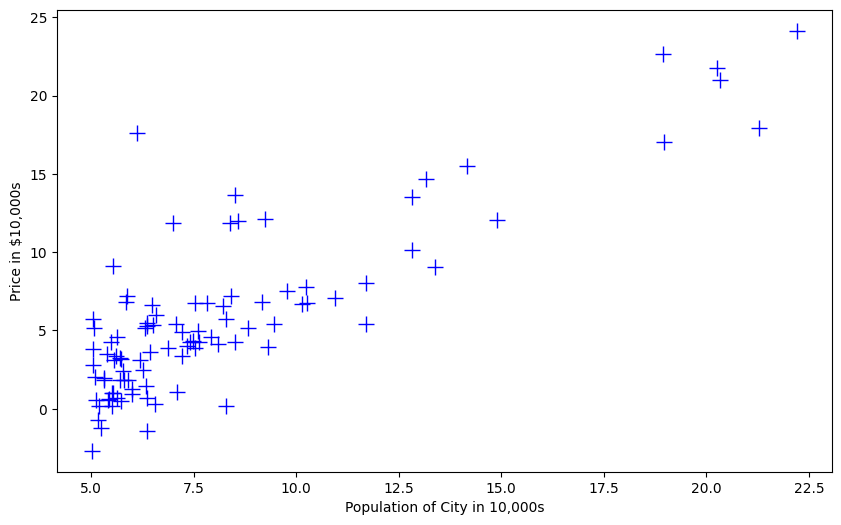

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Colab\ Notebooks/


%matplotlib inline
datafile = 'houseprices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True)

In [ ]:
#Convert to float
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [ ]:
y_train.shape, X_train.shape

((67, 1), (67, 2))

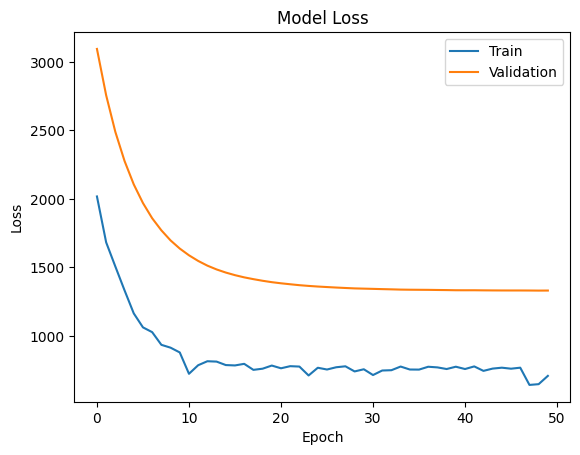

In [ ]:
hidden_layers = 1
units_per_layer = 2
learning_rates = 20

for hidden_layer in range(1,hidden_layers+1):
  for units in range(1, units_per_layer+1):
    for learning_rate in range(1, learning_rates+1):
      model = Sequential()
      model.add(Dense(units, activation='relu', input_shape=(2,)))
      for i in range(hidden_layer-1):
        model.add(Dense(units, activation='relu'))

      model.add(Dense(1))
      opt = keras.optimizers.SGD(learning_rate=0.001)

      mse = tf.keras.losses.MeanSquaredError(reduction=
              tf.keras.losses.Reduction.SUM)

      model.compile(loss=mse, optimizer=opt)
      history = model.fit(X_train,y_train,
      validation_data=(X_test, y_test),
      epochs=50, verbose=0)
      loss = model.evaluate(X_test,y_test, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

From the plots, it can be seen that both training and validation losses decrease together at a similar rate. The training data does not remain stagnant in response to experience and also does not continue to decrease when the validation loss flattens out. This points to a good fit, but there is a large gap between the training and validation data. This could mean that the data set is unrepresentative and that there are not enough data points in the data set.